# Лабораторная работа 5
## Предсказание дефолта по кредиту

## Выполнил: __Щеткин Дмитрий Сергеевич__

группа 2.1

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import average_precision_score
from sklearn import linear_model, ensemble
from sklearn.linear_model import LogisticRegression

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [2]:
%matplotlib inline
sns.set_style('whitegrid')
warnings.filterwarnings("ignore")

In [3]:
%%capture
!wget https://www.dropbox.com/s/io67uppgq66plbp/training_data.csv
!wget https://www.dropbox.com/s/2ga9maqxbsf8xhg/test_data.csv

In [4]:
training_data = pd.read_csv('training_data.csv')

In [5]:
training_data.sample(10, random_state=123)
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      50000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  50000 non-null  float64
 2   age                                   50000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  50000 non-null  int64  
 4   DebtRatio                             50000 non-null  float64
 5   MonthlyIncome                         40147 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       50000 non-null  int64  
 7   NumberOfTimes90DaysLate               50000 non-null  int64  
 8   NumberRealEstateLoansOrLines          50000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  50000 non-null  int64  
 10  NumberOfDependents                    48667 non-null  float64
dtypes: float64(4), 

In [6]:
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,50000.0,0.066860,0.249782,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,50000.0,7.927880,332.393142,0.0,0.030096,0.154426,0.555651,50708.0
age,50000.0,52.240520,14.766593,21.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,50000.0,0.428220,4.269296,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,50000.0,352.441921,2006.426016,0.0,0.176304,0.366811,0.862599,329664.0
MonthlyIncome,40147.0,6642.232222,18122.708690,0.0,3400.000000,5400.000000,8250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,50000.0,8.476040,5.172756,0.0,5.000000,8.000000,11.000000,57.0
NumberOfTimes90DaysLate,50000.0,0.269920,4.243110,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,50000.0,1.017500,1.120151,0.0,0.000000,1.000000,2.000000,32.0
NumberOfTime60-89DaysPastDueNotWorse,50000.0,0.246040,4.231055,0.0,0.000000,0.000000,0.000000,98.0


In [7]:
train_mean = training_data.mean()
training_data.fillna(train_mean, inplace=True)

In [8]:
target_variable_name = 'SeriousDlqin2yrs'
training_data[target_variable_name].value_counts()

,count
SeriousDlqin2yrs,
0,46657
1,3343


In [9]:
training_values = training_data[target_variable_name]
training_values.shape

(50000,)

In [10]:
training_points = training_data.drop(columns=target_variable_name)

In [11]:
training_data.shape # (50000, 11)

(50000, 11)

In [12]:
training_points.shape # (50000, 10)

(50000, 10)

In [13]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(training_points, training_values)

LogisticRegression()

In [14]:
random_forest_model = ensemble.RandomForestClassifier(n_estimators=100)
random_forest_model.fit(training_points, training_values)

RandomForestClassifier()

In [15]:
test_data = pd.read_csv('test_data.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      37500 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  37500 non-null  float64
 2   age                                   37500 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  37500 non-null  int64  
 4   DebtRatio                             37500 non-null  float64
 5   MonthlyIncome                         30044 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       37500 non-null  int64  
 7   NumberOfTimes90DaysLate               37500 non-null  int64  
 8   NumberRealEstateLoansOrLines          37500 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  37500 non-null  int64  
 10  NumberOfDependents                    36521 non-null  float64
dtypes: float64(4), 

In [16]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,37500.0,0.067387,0.250694,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,37500.0,6.031470,201.538421,0.0,0.029634,0.155112,0.565469,18300.0
age,37500.0,52.367387,14.769995,0.0,41.000000,52.000000,63.000000,107.0
NumberOfTime30-59DaysPastDueNotWorse,37500.0,0.448613,4.478678,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,37500.0,341.402289,1131.165077,0.0,0.173310,0.365951,0.866864,60212.0
MonthlyIncome,30044.0,6571.071295,7639.608316,0.0,3383.000000,5374.500000,8200.000000,562466.0
NumberOfOpenCreditLinesAndLoans,37500.0,8.428587,5.143302,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,37500.0,0.292667,4.458953,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,37500.0,1.020160,1.152043,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,37500.0,0.266160,4.444065,0.0,0.000000,0.000000,0.000000,98.0


In [17]:
test_mean = test_data.mean()
test_data.fillna(test_mean, inplace=True)

test_values = test_data[target_variable_name]
test_points = test_data.drop(columns=target_variable_name)
test_points.shape # (37500, 10)

(37500, 10)

In [18]:
test_predictions_logistic_regression = logistic_regression_model.predict(test_points)
test_predictions_random_forest = random_forest_model.predict(test_points)

In [19]:
pd.Series(test_predictions_logistic_regression).value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
3        0
4        0
        ..
37495    0
37496    0
37497    0
37498    0
37499    0
Length: 37500, dtype: int64>

In [20]:
pd.Series(test_predictions_random_forest).value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        1
2        0
3        0
4        0
        ..
37495    0
37496    0
37497    0
37498    0
37499    0
Length: 37500, dtype: int64>

In [21]:
accuracy_logistic_regression = accuracy_score(test_values, test_predictions_logistic_regression)
accuracy_random_forest = accuracy_score(test_values, test_predictions_random_forest)

In [22]:
accuracy_logistic_regression

0.9324533333333334

In [23]:
accuracy_random_forest

0.93408

In [24]:
constant_predictions = np.zeros_like(test_values)
accuracy_score(test_values, constant_predictions)

0.9326133333333333

In [25]:
logistic_regression_confusion_matrix = confusion_matrix(test_values, test_predictions_logistic_regression)
logistic_regression_confusion_matrix = pd.DataFrame(logistic_regression_confusion_matrix)
logistic_regression_confusion_matrix

,0,1
0,34938,35
1,2498,29


In [26]:
random_forest_confusion_matrix = confusion_matrix(test_values, test_predictions_random_forest)
random_forest_confusion_matrix = pd.DataFrame(random_forest_confusion_matrix)
random_forest_confusion_matrix

,0,1
0,34571,402
1,2070,457


In [27]:
test_probabilities = logistic_regression_model.predict_proba(test_points)
test_probabilities[:5, :]

array([[0.82039485, 0.17960515],
       [0.83652565, 0.16347435],
       [0.94724486, 0.05275514],
       [0.88775493, 0.11224507],
       [0.92403733, 0.07596267]])

In [28]:
test_probabilities = test_probabilities[:, 1]

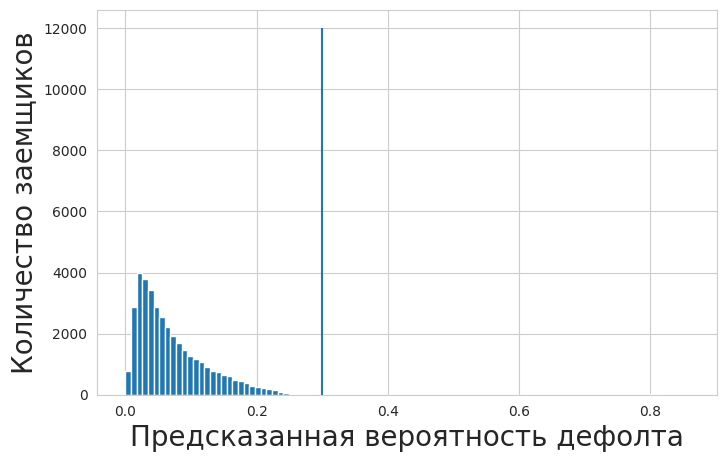

In [29]:
plt.figure(figsize=(8, 5))

plt.hist(test_probabilities, bins=100)
plt.vlines(0.3, 0, 12000)

plt.xlabel('Предсказанная вероятность дефолта', fontsize=20)
plt.ylabel('Количество заемщиков', fontsize=20);

In [30]:
higher_thershold = 0.7
alternative_test_predictions = test_probabilities > higher_thershold

alternative_confusion_matrix = pd.DataFrame(confusion_matrix(test_values, alternative_test_predictions))
alternative_confusion_matrix

,0,1
0,34947,26
1,2508,19


In [31]:
higher_thershold = 0.3
alternative_test_predictions = test_probabilities > higher_thershold

alternative_confusion_matrix = pd.DataFrame(confusion_matrix(test_values, alternative_test_predictions))
alternative_confusion_matrix

,0,1
0,34925,48
1,2483,44


In [32]:
test_probabilities = random_forest_model.predict_proba(test_points)
test_probabilities = test_probabilities[:, 1]

thresholds = [0.3, 0.5, 0.7]

for threshold in thresholds:
    print(f"\n confusion matrix for {threshold}:")
    predictions = test_probabilities > threshold

    conmatrix = pd.DataFrame(confusion_matrix(test_values, predictions))
    print(conmatrix)


 confusion matrix for 0.3:
       0     1
0  33595  1378
1   1550   977

 confusion matrix for 0.5:
       0    1
0  34571  402
1   2070  457

 confusion matrix for 0.7:
       0    1
0  34913   60
1   2400  127
